# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we use transfer learning to train a CNN to classify dog breeds.

### 1. Load Dog Dataset

Before running the code cell below, download the dataset of dog images [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) and place it in the respository.

In [3]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    print('filenames', data['filenames'])
    print('target', data['target'])
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load ordered list of dog names
dog_names = [item[25:-1] for item in glob('dogImages/train/*/')]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % str(len(train_files) + len(valid_files) + len(test_files)))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

filenames ['dogImages/train/095.Kuvasz/Kuvasz_06442.jpg'
 'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg'
 'dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg'
 ..., 'dogImages/train/029.Border_collie/Border_collie_02069.jpg'
 'dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03261.jpg'
 'dogImages/train/048.Chihuahua/Chihuahua_03416.jpg']
target [94 56 87 ..., 28 45 47]
filenames ['dogImages/valid/115.Papillon/Papillon_07495.jpg'
 'dogImages/valid/096.Labrador_retriever/Labrador_retriever_06448.jpg'
 'dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00318.jpg'
 'dogImages/valid/114.Otterhound/Otterhound_07421.jpg'
 'dogImages/valid/059.Doberman_pinscher/Doberman_pinscher_04197.jpg'
 'dogImages/valid/133.Yorkshire_terrier/Yorkshire_terrier_08333.jpg'
 'dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00798.jpg'
 'dogImages/valid/031.Borzoi/Borzoi_02193.jpg'
 'dogImages/valid/023.Bernese_mountain_dog/Bernese_mount

filenames ['dogImages/test/057.Dalmatian/Dalmatian_04056.jpg'
 'dogImages/test/059.Doberman_pinscher/Doberman_pinscher_04156.jpg'
 'dogImages/test/115.Papillon/Papillon_07480.jpg'
 'dogImages/test/019.Bedlington_terrier/Bedlington_terrier_01363.jpg'
 'dogImages/test/068.Flat-coated_retriever/Flat-coated_retriever_04703.jpg'
 'dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01548.jpg'
 'dogImages/test/043.Canaan_dog/Canaan_dog_03072.jpg'
 'dogImages/test/052.Clumber_spaniel/Clumber_spaniel_03715.jpg'
 'dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06518.jpg'
 'dogImages/test/051.Chow_chow/Chow_chow_03664.jpg'
 'dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg'
 'dogImages/test/019.Bedlington_terrier/Bedlington_terrier_01369.jpg'
 'dogImages/test/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05164.jpg'
 'dogImages/test/133.Yorkshire_terrier/Yorkshire_terrier_08337.jpg'
 'dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04931.jpg'
 'dogImages/test/014.Basenji

In [4]:
train_files

array(['dogImages/train/095.Kuvasz/Kuvasz_06442.jpg',
       'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg',
       'dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg',
       ..., 'dogImages/train/029.Border_collie/Border_collie_02069.jpg',
       'dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03261.jpg',
       'dogImages/train/048.Chihuahua/Chihuahua_03416.jpg'], 
      dtype='<U99')

In [5]:
train_targets

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
glob('dogImages/train/*/')

['dogImages/train/001.Affenpinscher/',
 'dogImages/train/002.Afghan_hound/',
 'dogImages/train/003.Airedale_terrier/',
 'dogImages/train/004.Akita/',
 'dogImages/train/005.Alaskan_malamute/',
 'dogImages/train/006.American_eskimo_dog/',
 'dogImages/train/007.American_foxhound/',
 'dogImages/train/008.American_staffordshire_terrier/',
 'dogImages/train/009.American_water_spaniel/',
 'dogImages/train/010.Anatolian_shepherd_dog/',
 'dogImages/train/011.Australian_cattle_dog/',
 'dogImages/train/012.Australian_shepherd/',
 'dogImages/train/013.Australian_terrier/',
 'dogImages/train/014.Basenji/',
 'dogImages/train/015.Basset_hound/',
 'dogImages/train/016.Beagle/',
 'dogImages/train/017.Bearded_collie/',
 'dogImages/train/018.Beauceron/',
 'dogImages/train/019.Bedlington_terrier/',
 'dogImages/train/020.Belgian_malinois/',
 'dogImages/train/021.Belgian_sheepdog/',
 'dogImages/train/022.Belgian_tervuren/',
 'dogImages/train/023.Bernese_mountain_dog/',
 'dogImages/train/024.Bichon_frise/',


### 2. Visualize the First 12 Training Images

img_path dogImages/train/095.Kuvasz/Kuvasz_06442.jpg
img_path dogImages/train/057.Dalmatian/Dalmatian_04054.jpg
img_path dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg
img_path dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00596.jpg
img_path dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00563.jpg
img_path dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04469.jpg
img_path dogImages/train/054.Collie/Collie_03789.jpg
img_path dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07705.jpg
img_path dogImages/train/009.American_water_spaniel/American_water_spaniel_00625.jpg
img_path dogImages/train/081.Greyhound/Greyhound_05559.jpg
img_path dogImages/train/012.Australian_shepherd/Australian_shepherd_00814.jpg
img_path dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04890.jpg


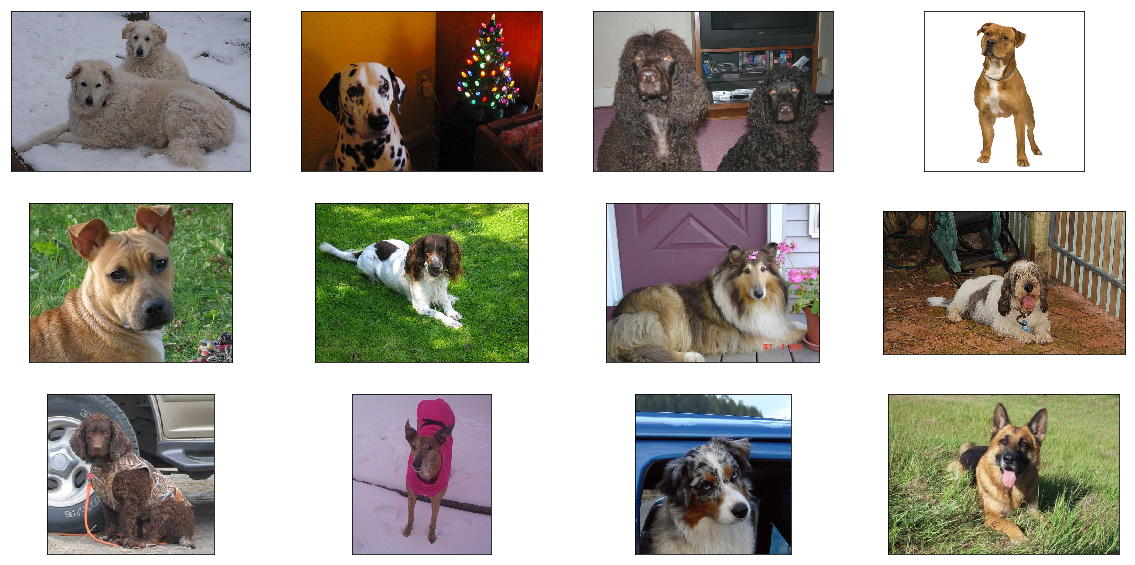

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    print('img_path', img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    
    
fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)

In [29]:
img = cv2.imread('dogImages/train/095.Kuvasz/Kuvasz_06442.jpg')
print('shape', img.shape)
img

shape (427, 640, 3)


array([[[182, 164, 157],
        [177, 158, 155],
        [171, 153, 152],
        ..., 
        [169, 150, 145],
        [166, 148, 141],
        [164, 147, 138]],

       [[183, 167, 161],
        [182, 165, 162],
        [176, 158, 157],
        ..., 
        [166, 147, 142],
        [165, 147, 140],
        [164, 146, 139]],

       [[178, 161, 158],
        [186, 171, 169],
        [185, 169, 170],
        ..., 
        [164, 145, 140],
        [163, 145, 138],
        [164, 146, 139]],

       ..., 
       [[ 14,  31,  34],
        [ 14,  33,  36],
        [ 16,  35,  40],
        ..., 
        [176, 156, 155],
        [176, 159, 156],
        [175, 159, 153]],

       [[ 13,  30,  33],
        [ 15,  32,  35],
        [ 17,  33,  39],
        ..., 
        [177, 157, 156],
        [177, 160, 157],
        [176, 160, 154]],

       [[ 15,  30,  33],
        [ 16,  31,  34],
        [ 18,  32,  38],
        ..., 
        [178, 158, 157],
        [179, 160, 155],
        [176, 160,

In [9]:
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

array([[[157, 164, 182],
        [155, 158, 177],
        [152, 153, 171],
        ..., 
        [145, 150, 169],
        [141, 148, 166],
        [138, 147, 164]],

       [[161, 167, 183],
        [162, 165, 182],
        [157, 158, 176],
        ..., 
        [142, 147, 166],
        [140, 147, 165],
        [139, 146, 164]],

       [[158, 161, 178],
        [169, 171, 186],
        [170, 169, 185],
        ..., 
        [140, 145, 164],
        [138, 145, 163],
        [139, 146, 164]],

       ..., 
       [[ 34,  31,  14],
        [ 36,  33,  14],
        [ 40,  35,  16],
        ..., 
        [155, 156, 176],
        [156, 159, 176],
        [153, 159, 175]],

       [[ 33,  30,  13],
        [ 35,  32,  15],
        [ 39,  33,  17],
        ..., 
        [156, 157, 177],
        [157, 160, 177],
        [154, 160, 176]],

       [[ 33,  30,  15],
        [ 34,  31,  16],
        [ 38,  32,  18],
        ..., 
        [157, 158, 178],
        [155, 160, 179],
        [154, 160,

### 3. Obtain the VGG-16 Bottleneck Features

Before running the code cell below, download the file linked [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz) and place it in the `bottleneck_features/` folder.

In [12]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_vgg16 = bottleneck_features['train']
valid_vgg16 = bottleneck_features['valid']
test_vgg16 = bottleneck_features['test']

In [15]:
train_vgg16.shape, valid_vgg16.shape, test_vgg16.shape

((6680, 7, 7, 512), (835, 7, 7, 512), (836, 7, 7, 512))

### 4. Define a Model Architecture (Model 1)

In [16]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))
model.add(Dense(133, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               3336837   
Total params: 3,336,837
Trainable params: 3,336,837
Non-trainable params: 0
_________________________________________________________________


### 5. Define another Model Architecture (Model 2)

In [18]:
from keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7, 7, 512)))
model.add(Dense(133, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model (Model 2)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model (Model 2)

In [20]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='dogvgg16.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(train_vgg16, train_targets, epochs=20, 
          validation_data=(valid_vgg16, valid_targets), 
          callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6656/6680 [============================>.] - ETA: 0s - loss: 11.6182 - acc: 0.1346
Epoch 00001: val_loss improved from inf to 9.96105, saving model to dogvgg16.weights.best.hdf5
6680/6680 [==============================] - 5s 728us/step - loss: 11.6157 - acc: 0.1347 - val_loss: 9.9611 - val_acc: 0.2383
Epoch 2/20
6656/6680 [============================>.] - ETA: 0s - loss: 9.0418 - acc: 0.3215- ETA: 0s - loss: 9.0633 
Epoch 00002: val_loss improved from 9.96105 to 9.00486, saving model to dogvgg16.weights.best.hdf5
6680/6680 [==============================] - 4s 585us/step - loss: 9.0491 - acc: 0.3213 - val_loss: 9.0049 - val_acc: 0.3377
Epoch 3/20
6592/6680 [============================>.] - ETA: 0s - loss: 8.3924 - acc: 0.4029
Epoch 00003: val_loss improved from 9.00486 to 8.70925, saving model to dogvgg16.weights.best.hdf5
6680/6680 [==============================] - 3s 426us/step - loss: 8.3866 - acc: 0.4034 - val_loss: 8.70

### 8. Load the Model with the Best Validation Accuracy (Model 2)

In [21]:
# load the weights that yielded the best validation accuracy
model.load_weights('dogvgg16.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set (Model 2)

In [22]:
# get index of predicted dog breed for each image in test set
vgg16_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in test_vgg16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(vgg16_predictions)==
                           np.argmax(test_targets, axis=1))/len(vgg16_predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)


Test accuracy: 46.8900%


In [24]:
np.expand_dims(test_vgg16[0], axis=0).shape

(1, 7, 7, 512)

In [25]:
test_vgg16[0].shape

(7, 7, 512)

In [28]:
# Rui solution:
score = model.evaluate(test_vgg16, test_targets)
print('accuracy', score[1])

836/836 [==============================] - 0s 426us/step
accuracy 0.468899521531
